# IMPEDANCE TRANSFORMERS DESIGN

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp2d
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

## DADOS GERADORES

In [3]:
#GRAFICO1
X = np.linspace(20, 50, 1000)
Y = np.linspace(1,5,1000) * (10**(-12))
x, y = np.meshgrid(X, Y)
y = np.flip(y)

#GRAFICO2
X1 = np.linspace(30, 45, 1000)
Y1 = np.linspace(40, 80, 1000)
x1,y1 = np.meshgrid (X1, Y1)
y1=np.flip(y1)

# GRÁFICO 1

In [4]:
####PARAMETROS CIRCUITOS
Ic=1.3*(10**(-6)) #corrente crítica JPA
phi0=2.06783*(10**(-15)) #quanta de fluxo
R=50 #impedancia da chain
omega0=(np.sqrt(((2*(np.pi)*Ic))/(phi0*C)))
#omega0=wt+(0.01*(10**9))
print(omega0)
f0=omega0/(2*np.pi)
print('f0=', omega0/(2*np.pi*1000000000)) #em GHz
#f0=6.9*(10**9)
#omega0=f0*2*np.pi


#####CONSTANTES
wt=7*(10**9) #freq projetada dos ressonadores
lamb2=60 #impedância do ressonador lamb/2

print(omega0)
####CÁLCULO
k0=1/(R * 2 * y)
wd=(f0-wt)* 2 * (np.pi) #
#print('wd=', wd/1000000000)
#wd=1*(10**9)
beta= (2 * wd)/((np.sqrt(3)) * (k0))
lamb= (k0 * (1 + (3 * beta**2))**0.5)/(12**0.5)
rl=(x**2)/R

alpha=((np.pi) /(2*wt)) * ((x * (1-(rl/R))) + (2 * lamb2 *(1-(rl/lamb2)**2)))
g1=((alpha*R)/(x**2))-(k0/(2*(lamb**2-wd**2)))
G0=1+(((2)*((k0 * lamb)**0.5))/(2 * g1*(lamb**2 - wd**2)))**4

BW=(k0/2)*((1/G0)**((1/4)))


BW_MHz=BW * 10**(-6)
BWteste = BW_MHz
BWteste[G0 < 18] = 0
BWteste[BW_MHz < 300]=0
BWteste[BW_MHz > 1000]=0

cp=1.5*(10**-12)
#grafico1
plt.contourf(x, y, BWteste,cmap='hot')
clb = plt.colorbar()
clb.set_label('Largura de Banda [MHz]', y=0.5, ha='center')
plt.title(r'$Z_{\lambda/2}$ = 60 $\Omega$')
plt.ylabel(r'$C_p$ [pF]')
plt.xlabel(r'$Z_{\lambda/4}$')
plt.show()

NameError: name 'C' is not defined

## GRÁFICO 2

In [ ]:
####PARAMETROS CIRCUITOS
C=2*(10**(-12)) #capacitância JPA
wt=7*(10**9) #freq projetada dos ressonadores

Ic=1.3*(10**(-6)) #corrente crítica JPA
phi0=2.06783*(10**(-15)) #quanta de fluxo
R=50 #impedancia da chain
omega0=np.sqrt(((2*(np.pi)*Ic))/(phi0*C))
#omega0=wt+(0.01*(10**9))
#print('f0=', omega0/(2*np.pi*1000000000)) #em GHz
#f0=6.9*(10**9)
#omega0=f0*2*np.pi
f0=omega0/(2*np.pi)

####CÁLCULO
k0=1/(R * 2 * C)
wd=(f0-wt)* 2 * (np.pi)
beta= (2 * wd)/((np.sqrt(3)) * (k0))
lamb= (k0 * (1 + (3 * beta**2))**0.5)/(12**0.5)
print('{:.5E}'.format(lamb))
print(lamb)
rl=(x1**2)/R

alpha=((np.pi) /(2*wt)) * ((x1 * (1-(rl/R))) + (2 * y1 *(1-(rl/y1)**2)))
g1=((alpha*R)/(x1**2))-(k0/(2*(lamb**2-wd**2)))
G0=1+(((2)*((k0 * lamb)**0.5))/(2 * g1*(lamb**2 - wd**2)))**4

BW=(k0/2)*((1/G0)**((1/4)))


BW_MHz=BW * 10**(-6)
BWteste1 = BW_MHz
BWteste1[G0 < 18] = 0
BWteste1[BW_MHz < 300]=0
BWteste1[BW_MHz > 1000]=0

#gráfico2
plt.contourf(x1, y1, BWteste1,cmap='hot')
clb = plt.colorbar()
clb.set_label('Largura de Banda [MHz]', y=0.5, ha='center')
plt.title(r'$C_p$ = 2 pF')
plt.ylabel(r'$Z_{\lambda/2}$ [$\Omega$]')
plt.xlabel(r'$Z_{\lambda/4}$ [$\Omega$]')

plt.show()

# Análise dos TI em função de $Z_{JPA}$

### $\omega_d=\omega_{JPA}-\omega_p$
### $\kappa_0=\frac{\omega_{JPA}Z_{JPA}}R$
### $\beta=\frac{2\omega_d}{\sqrt3\kappa_0}$
### $Z_{opt}=\eta\frac{R^2}{Z_{JPA}}$
### $\eta=\frac{\omega_p}{\omega_{JPA}}\frac1{1+\sqrt2\sqrt{1+3\beta^2-2\beta\sqrt{1+3\beta^2}}}$

# GRÁFICO 1

In [47]:
#PARÂMETROS FIXOS
phi0=2.06783*(10**(-15)) #quanta de fluxo
R=50#impedancia da chain
lamb2=60 #impedância do ressonador lamb/2

#variando Z_lamb4
x=np.linspace(20,50,1000) #dados gerados Z_lamb/4
y=np.linspace(1,6,1000) * (10**-12) #dados gerados C
Z_lamb4, C = np.meshgrid(x, y)
C = np.flip(C)
#dados Gráfico 1
####PARAMETROS CIRCUITOS
Ic=3.2*(10**(-6)) #corrente crítica da JJ do SQUID
w_JPA=(np.sqrt(((4*(np.pi)*Ic))/(phi0*C)))
wd=w_JPA+(0.01*(10**9))
f0=w_JPA/(2*np.pi)
print(r'f_{jpa}=', w_JPA/1000000000) #em GHz


####CÁLCULO
k0=1/(R * 2 * C)
beta= (2 * wd)/((np.sqrt(3)) * (k0))
lamb= (k0 * (1 + (3 * beta**2))**0.5)/(12**0.5)
rl=(Z_lamb4**2)/R

alpha=((np.pi) /(2*wd)) * ((Z_lamb4 * (1-(rl/R))) + (2 * lamb2 *(1-(rl/lamb2)**2)))
g1=((alpha*R)/(Z_lamb4**2))-(k0/(2*(lamb**2-wd**2)))
G0=1+(((2)*((k0 * lamb)**0.5))/(2 * g1*(lamb**2 - wd**2)))**4

BW=(k0/2)*((1/G0)**((1/4)))


BW_MHz=BW * 10**(-6)
BWteste = BW_MHz
BWteste[G0 < 18] = 0
BWteste[BW_MHz < 300]=0
BWteste[BW_MHz > 1000]=0

f_{jpa}= [[ 56.93074671  56.93074671  56.93074671 ...  56.93074671  56.93074671
   56.93074671]
 [ 56.95450646  56.95450646  56.95450646 ...  56.95450646  56.95450646
   56.95450646]
 [ 56.97829599  56.97829599  56.97829599 ...  56.97829599  56.97829599
   56.97829599]
 ...
 [138.75852233 138.75852233 138.75852233 ... 138.75852233 138.75852233
  138.75852233]
 [139.10360747 139.10360747 139.10360747 ... 139.10360747 139.10360747
  139.10360747]
 [139.45128011 139.45128011 139.45128011 ... 139.45128011 139.45128011
  139.45128011]]


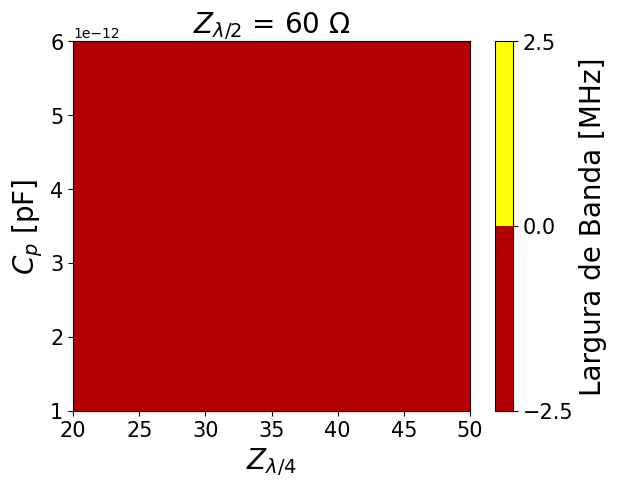

In [48]:
#grafico1
plt.contourf(Z_lamb4, C, BWteste,cmap='hot')
clb = plt.colorbar()
clb.set_label('Largura de Banda [MHz]', y=0.5, ha='center', fontsize=20)
ticklabs = clb.ax.get_yticklabels()
clb.ax.set_yticklabels(ticklabs, fontsize=15)
plt.title(r'$Z_{\lambda/2}$ = 60 $\Omega$', fontsize=20)
plt.ylabel(r'$C_p$ [pF]', fontsize=20)
plt.xlabel(r'$Z_{\lambda/4}$', fontsize=20)
#plt.plot(40, (cp), "-o")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


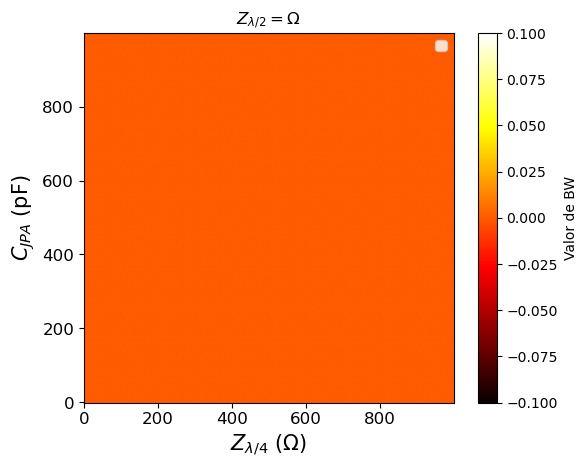

In [41]:
fig, ax = plt.subplots(1, 1, sharex=False)
#plt.suptitle(r'Correção medição $\lambda/4$ do fundo DR 18dBspan (em dB)', fontsize=20)

#ax.contourf(Z_lamb4, C, BWteste, cmap='hot')

im1= ax.imshow(BWteste, cmap='hot', origin='lower')
cbar1 = fig.colorbar(im1, ax=ax)
cbar1.set_label('Valor de BW')


#clb = plt.colorbar(BWteste)
#clb.set_label('Largura de Banda [MHz]', y=0.5, ha='center', fontsize=20)
#ticklabs = clb.ax.get_yticklabels()
#clb.ax.set_yticklabels(ticklabs, fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title(r'$Z_{\lambda/2}=\Omega$')
ax.set_xlabel(r"$Z_{\lambda/4}$ ($\Omega$)", fontsize=15)
ax.set_ylabel(r"$C_{JPA}$ (pF)", fontsize=15)
ax.legend(loc='upper right', prop={'size': 10})
#ax.show()

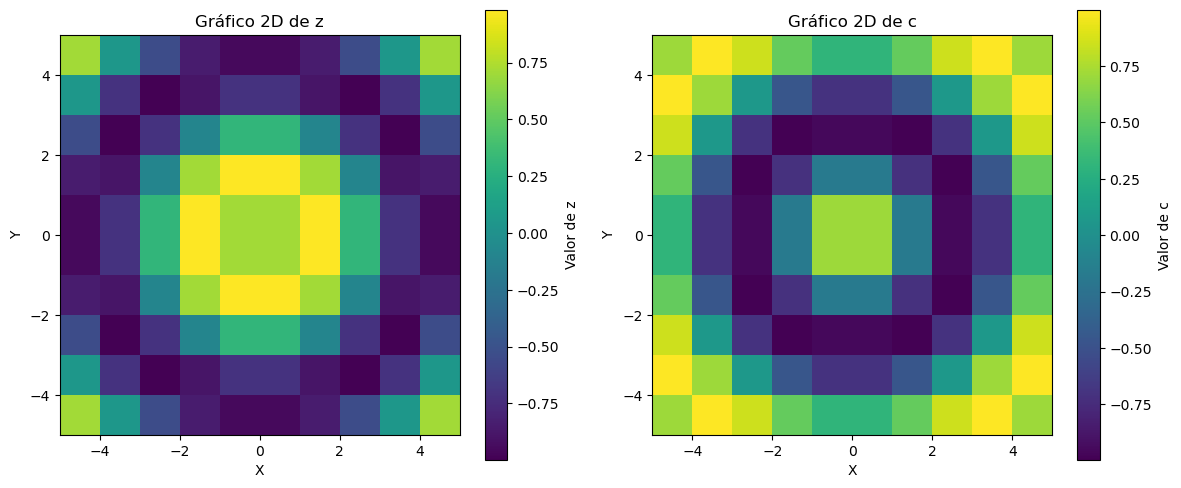

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Criação dos dados
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Variável mapeada por cor
c = np.cos(np.sqrt(x**2 + y**2))

# Plotagem
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico
im1 = axs[0].imshow(z, cmap='viridis', origin='lower', extent=[-5, 5, -5, 5])
axs[0].set_title('Gráfico 2D de z')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_label('Valor de z')

# Segundo gráfico
im2 = axs[1].imshow(c, cmap='viridis', origin='lower', extent=[-5, 5, -5, 5])
axs[1].set_title('Gráfico 2D de c')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label('Valor de c')

plt.tight_layout()
plt.show()